<a href="https://colab.research.google.com/github/OceaniaCitizen1984/RN-SMOTE-on-Imbalanced-Data/blob/main/src/RN_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing.

## Library Import & Data Extraction

In [308]:
!pip install xgboost

In [309]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [310]:
data = pd.read_csv('train_test_network.csv')

## Data Exploration

In [311]:
data.head(10)

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
5,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.008403,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
6,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000137,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
7,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000143,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
8,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000200,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
9,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000009,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211043 entries, 0 to 211042
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   src_ip                  211043 non-null  object 
 1   src_port                211043 non-null  int64  
 2   dst_ip                  211043 non-null  object 
 3   dst_port                211043 non-null  int64  
 4   proto                   211043 non-null  object 
 5   service                 211043 non-null  object 
 6   duration                211043 non-null  float64
 7   src_bytes               211043 non-null  int64  
 8   dst_bytes               211043 non-null  int64  
 9   conn_state              211043 non-null  object 
 10  missed_bytes            211043 non-null  int64  
 11  src_pkts                211043 non-null  int64  
 12  src_ip_bytes            211043 non-null  int64  
 13  dst_pkts                211043 non-null  int64  
 14  dst_ip_bytes        

In [313]:
data.drop(columns=['src_ip', 'src_port', 'dst_ip', 'dst_port'], inplace=True)

data.drop(columns=['type'], inplace=True)

In [314]:
data.columns

Index(['proto', 'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state',
       'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
       'dns_query', 'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD',
       'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label'],
      dtype='object')

In [315]:
categorical_columns = [
    'proto',
    'service',
    'conn_state',
    'dns_AA',
    'dns_RD',
    'dns_RA',
    'dns_rejected',
    'dns_query',
    'ssl_version',
    'ssl_cipher',
    'ssl_resumed',
    'ssl_established',
    'ssl_subject',
    'ssl_issuer',
    'http_trans_depth',
    'http_method',
    'http_uri',
    'http_version',
    'http_user_agent',
    'http_orig_mime_types',
    'http_resp_mime_types',
    'weird_name',
    'weird_addl',
    'weird_notice',
]
numerical_columns = set(data.columns) - set(categorical_columns)

In [316]:
data[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211043 entries, 0 to 211042
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   proto                 211043 non-null  object
 1   service               211043 non-null  object
 2   conn_state            211043 non-null  object
 3   dns_AA                211043 non-null  object
 4   dns_RD                211043 non-null  object
 5   dns_RA                211043 non-null  object
 6   dns_rejected          211043 non-null  object
 7   dns_query             211043 non-null  object
 8   ssl_version           211043 non-null  object
 9   ssl_cipher            211043 non-null  object
 10  ssl_resumed           211043 non-null  object
 11  ssl_established       211043 non-null  object
 12  ssl_subject           211043 non-null  object
 13  ssl_issuer            211043 non-null  object
 14  http_trans_depth      211043 non-null  object
 15  http_method      

In [317]:
total_unique_values = 0
for col in categorical_columns:
    num_unique_values = data[col].nunique()
    print(col, num_unique_values)
    total_unique_values += num_unique_values

print(total_unique_values, "unique categorical values")

proto 3
service 9
conn_state 13
dns_AA 3
dns_RD 3
dns_RA 3
dns_rejected 3
dns_query 726
ssl_version 4
ssl_cipher 6
ssl_resumed 3
ssl_established 3
ssl_subject 6
ssl_issuer 5
http_trans_depth 11
http_method 4
http_uri 86
http_version 2
http_user_agent 35
http_orig_mime_types 3
http_resp_mime_types 10
weird_name 11
weird_addl 3
weird_notice 2
957 unique categorical values


## Data Cleaning

In [318]:
data.drop(columns=['dns_query'], inplace=True)

In [319]:
categorical_columns = list(set(categorical_columns) - set(['dns_query']))
print(categorical_columns)

['ssl_version', 'ssl_subject', 'conn_state', 'http_uri', 'http_resp_mime_types', 'dns_RA', 'service', 'ssl_established', 'weird_notice', 'http_trans_depth', 'ssl_issuer', 'ssl_resumed', 'http_method', 'dns_AA', 'weird_name', 'http_user_agent', 'proto', 'dns_rejected', 'ssl_cipher', 'weird_addl', 'dns_RD', 'http_version', 'http_orig_mime_types']


In [320]:
pd.get_dummies(data, columns=categorical_columns)

,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,...,weird_addl_46,weird_addl_48,dns_RD_-,dns_RD_F,dns_RD_T,http_version_-,http_version_1.1,http_orig_mime_types_-,http_orig_mime_types_application/soap+xml,http_orig_mime_types_application/xml
0,290.371539,101568,2592,0,108,108064,31,3832,0,0,...,False,False,True,False,False,True,False,True,False,False
1,0.000102,0,0,0,1,52,1,40,0,0,...,False,False,True,False,False,True,False,True,False,False
2,0.000148,0,0,0,1,52,1,40,0,0,...,False,False,True,False,False,True,False,True,False,False
3,0.000113,0,0,0,1,48,1,40,0,0,...,False,False,True,False,False,True,False,True,False,False
4,0.000130,0,0,0,1,52,1,40,0,0,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211038,65.376610,2665,322,0,5,2925,5,590,0,0,...,False,False,True,False,False,True,False,True,False,False
211039,65.710346,1987,322,0,6,2307,5,590,0,0,...,False,False,True,False,False,True,False,True,False,False
211040,65.766512,3922,322,0,7,4294,6,642,0,0,...,False,False,True,False,False,True,False,True,False,False
211041,65.753940,2401,322,0,6,2721,5,590,0,0,...,False,False,True,False,False,True,False,True,False,False


In [321]:
data[list(numerical_columns)]

,http_request_body_len,http_status_code,dns_qtype,dns_qclass,duration,dst_bytes,dst_pkts,src_ip_bytes,src_bytes,dst_ip_bytes,missed_bytes,dns_rcode,label,http_response_body_len,src_pkts
0,0,0,0,0,290.371539,2592,31,108064,101568,3832,0,0,1,0,108
1,0,0,0,0,0.000102,0,1,52,0,40,0,0,1,0,1
2,0,0,0,0,0.000148,0,1,52,0,40,0,0,1,0,1
3,0,0,0,0,0.000113,0,1,48,0,40,0,0,1,0,1
4,0,0,0,0,0.000130,0,1,52,0,40,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211038,0,0,0,0,65.376610,322,5,2925,2665,590,0,0,1,0,5
211039,0,0,0,0,65.710346,322,5,2307,1987,590,0,0,1,0,6
211040,0,0,0,0,65.766512,322,6,4294,3922,642,0,0,1,0,7
211041,0,0,0,0,65.753940,322,5,2721,2401,590,0,0,1,0,6


In [322]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

data_n = data

data_n.head()

,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,...,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label
0,tcp,-,290.371539,101568,2592,OTH,0,108,108064,31,...,0,0,0,-,-,-,-,-,-,1
1,tcp,-,0.000102,0,0,REJ,0,1,52,1,...,0,0,0,-,-,-,-,-,-,1
2,tcp,-,0.000148,0,0,REJ,0,1,52,1,...,0,0,0,-,-,-,-,-,-,1
3,tcp,-,0.000113,0,0,REJ,0,1,48,1,...,0,0,0,-,-,-,-,-,-,1
4,tcp,-,0.000130,0,0,REJ,0,1,52,1,...,0,0,0,-,-,-,-,-,-,1


In [323]:
data_n[list(numerical_columns)] = pd.DataFrame(standard_scaler.fit_transform(data[list(numerical_columns)]))
data_n[list(numerical_columns)] = pd.DataFrame(robust_scaler.fit_transform(data[list(numerical_columns)]))
data_n[list(numerical_columns)] = pd.DataFrame(min_max_scaler.fit_transform(data[list(numerical_columns)]))

In [324]:
data_n.head()


,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,...,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label
0,tcp,-,3.105016e-03,0.000026,6.622629e-07,OTH,0.0,0.004386,0.016568,0.000254,...,0.0,0.0,0.0,-,-,-,-,-,-,1.0
1,tcp,-,1.090712e-09,0.000000,0.000000e+00,REJ,0.0,0.000041,0.000008,0.000008,...,0.0,0.0,0.0,-,-,-,-,-,-,1.0
2,tcp,-,1.582601e-09,0.000000,0.000000e+00,REJ,0.0,0.000041,0.000008,0.000008,...,0.0,0.0,0.0,-,-,-,-,-,-,1.0
3,tcp,-,1.208337e-09,0.000000,0.000000e+00,REJ,0.0,0.000041,0.000007,0.000008,...,0.0,0.0,0.0,-,-,-,-,-,-,1.0
4,tcp,-,1.390123e-09,0.000000,0.000000e+00,REJ,0.0,0.000041,0.000008,0.000008,...,0.0,0.0,0.0,-,-,-,-,-,-,1.0


In [325]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from time import time
from sklearn.model_selection import train_test_split

# try 85/15 and 90/10
# make a graph to show accuracies

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_n['label'])  # Replace 'label' with the correct target column name

# cats_partial = {
#                  # 'ssl_issuer', 'http_orig_mime_types', 'ssl_cipher', 'ssl_resumed', 'http_uri',
#                  'http_user_agent',
#                 'proto',
#                 'http_resp_mime_types',
#                 'dns_rejected',
#                 'http_method',
#                  'weird_name', 'dns_RD', 'dns_AA', 'ssl_subject', 'service', 'weird_notice', 'http_version',
#                  'dns_RA', 'weird_addl', 'ssl_version',
#     #             'http_trans_depth',
#     # 'ssl_established',
#     'conn_state',
# }
cats_partial = {
                 'ssl_issuer', 'http_orig_mime_types', 'ssl_cipher', 'ssl_resumed', 'http_uri',
                 'http_user_agent',
                'proto',
                'http_resp_mime_types',
                'dns_rejected',
                'http_method',
                 'weird_name', 'dns_RD', 'dns_AA', 'ssl_subject', 'service', 'weird_notice', 'http_version',
                 'dns_RA', 'weird_addl', 'ssl_version',
                'http_trans_depth',
    'ssl_established',
    'conn_state',
}

# df_n = pd.get_dummies(df, columns=categorical_columns)
x = data_n[list(cats_partial.union(numerical_columns).difference({'label'}))]
x = pd.get_dummies(x, columns=list(cats_partial))

# Clean column names to avoid special characters
x.columns = x.columns.str.replace(r"[^A-Za-z0-9_]", "", regex=True)


# Model with Different

## We will be try different balancing techinques:


*   All Features
*   SMOTE
*   RN-SMOTE

## We will use XGBoost to test all of them.



## Imbalanced data

In [326]:
Imbalanced_data = x

In [327]:
X_train, X_test, y_train, y_test = train_test_split(Imbalanced_data, y, test_size=0.1, random_state=2)

In [328]:
y_train = y_train.values.ravel() if isinstance(y_train, pd.DataFrame) else y_train
X_train = X_train.values if not isinstance(X_train, (pd.DataFrame, np.ndarray)) else X_train


In [329]:
# Ensure column names are valid
X_train.columns = X_train.columns.str.replace(r"[^A-Za-z0-9_]", "", regex=True)

# Ensure all columns are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Convert X_train to NumPy if needed
X_train = X_train.values

# Train the model
model = XGBClassifier(
    n_estimators=100,         # Number of trees in the ensemble
    learning_rate=0.1,        # Step size shrinkage
    max_depth=6,              # Maximum tree depth
    subsample=0.8,            # Fraction of samples for each tree
    colsample_bytree=0.8,     # Fraction of features for each tree
    scale_pos_weight=1,       # Balances positive/negative classes (adjust for imbalanced data)
    gamma=0,                  # Minimum loss reduction for splitting
    reg_alpha=0.1,            # L1 regularization term (sparsity)
    reg_lambda=1,             # L2 regularization term (smoothness)
    random_state=42,          # Seed for reproducibility
    use_label_encoder=False,  # Disable label encoding (for newer XGBoost versions)
    eval_metric="logloss")
model = model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:54:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [330]:
# Ensure column names are clean
X_test.columns = X_test.columns.str.replace(r"[^A-Za-z0-9_]", "", regex=True)

# Ensure all data is numeric
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Convert X_test to NumPy if needed
X_test = X_test.values

# Make predictions
y_pred_ = model.predict(X_test)



Accuracy: 0.9973


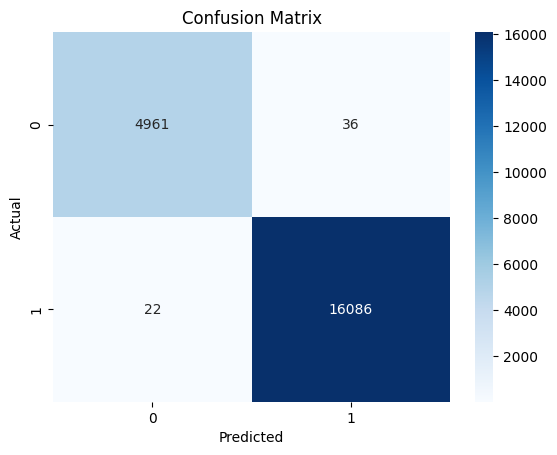

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4997
           1       1.00      1.00      1.00     16108

    accuracy                           1.00     21105
   macro avg       1.00      1.00      1.00     21105
weighted avg       1.00      1.00      1.00     21105

ROC-AUC Score: 0.9998


In [331]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC (for binary classification)
if len(set(y_test)) == 2:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score: {roc_auc:.4f}")


## SMOTE

In [332]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
from collections import Counter
print(f"Original y_train distribution: {Counter(y_train)}")
print(f"SMOTE y_train distribution: {Counter(y_train_smote)}")


Original y_train distribution: Counter({1: 144935, 0: 45003})
SMOTE y_train distribution: Counter({1: 144935, 0: 144935})


In [333]:
model_smote = model.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:55:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [334]:
# Make predictions
y_pred_smote = model_smote.predict(X_test)

Accuracy: 0.8205


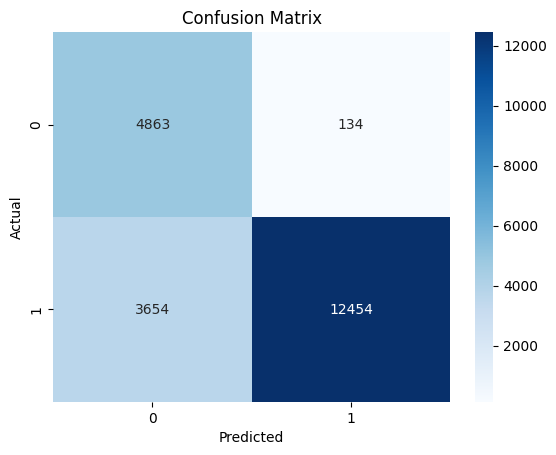

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.97      0.72      4997
           1       0.99      0.77      0.87     16108

    accuracy                           0.82     21105
   macro avg       0.78      0.87      0.79     21105
weighted avg       0.89      0.82      0.83     21105

ROC-AUC Score: 0.9817


In [342]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_smote)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_smote))

# ROC-AUC (for binary classification)
if len(set(y_test)) == 2:
    y_pred_proba_smote = model_smote.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score: {roc_auc:.4f}")


## RNSMOTE

In [336]:
smote = SMOTE(random_state=42)
X_train_rnsmote, y_train_rnsmote = smote.fit_resample(X_train, y_train)

# Add random noise to synthetic samples
noise = np.random.normal(loc=0, scale=0.01, size=X_train_rnsmote.shape)  # Adjust `scale` as needed
X_train_rnsmote += noise

# Check class distribution after RN-SMOTE
print(f"RN-SMOTE y_train distribution: {Counter(y_train_rnsmote)}")

RN-SMOTE y_train distribution: Counter({1: 144935, 0: 144935})


In [337]:
model_rnsmote = model.fit(X_train_rnsmote, y_train_rnsmote)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:57:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [338]:
y_pred_rnsmote = model_rnsmote.predict(X_test)

Accuracy: 0.8205


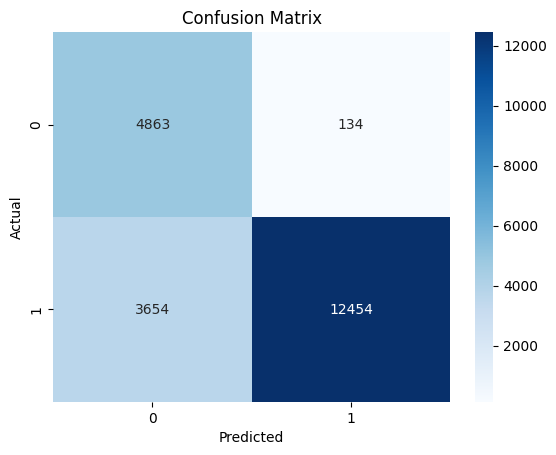

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.97      0.72      4997
           1       0.99      0.77      0.87     16108

    accuracy                           0.82     21105
   macro avg       0.78      0.87      0.79     21105
weighted avg       0.89      0.82      0.83     21105

ROC-AUC Score: 0.9817


In [339]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_rnsmote)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rnsmote)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rnsmote))

# ROC-AUC (for binary classification)
if len(set(y_test)) == 2:
    y_pred_proba_rnsmote = model_rnsmote.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score: {roc_auc:.4f}")


In [343]:
def get_metrics(y_true, y_pred, y_pred_proba=None):
    accuracy = accuracy_score(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, output_dict=True)
    metrics = {
        'accuracy': accuracy,
        'precision': class_report['weighted avg']['precision'],
        'recall': class_report['weighted avg']['recall'],
        'f1_score': class_report['weighted avg']['f1-score'],
    }
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_true, y_pred_proba)
        metrics['roc_auc'] = roc_auc

    return metrics
y_pred_model = model.predict(X_test)
y_pred_proba_model = model.predict_proba(X_test)[:, 1]

y_pred_smote = model_smote.predict(X_test)
y_pred_proba_smote = model_smote.predict_proba(X_test)[:, 1]

# Predict for RN-SMOTE
y_pred_rnsmote = model_rnsmote.predict(X_test)
y_pred_proba_rnsmote = model_rnsmote.predict_proba(X_test)[:, 1]

model_metrics = get_metrics(y_test, y_pred, y_pred_proba)
# Get metrics for SMOTE
metrics_smote = get_metrics(y_test, y_pred_smote, y_pred_proba_smote)

# Get metrics for RN-SMOTE
metrics_rnsmote = get_metrics(y_test, y_pred_rnsmote, y_pred_proba_rnsmote)

# Combine the results into a DataFrame
metrics_df = pd.DataFrame([model_metrics,metrics_smote, metrics_rnsmote], index=['No Balance','SMOTE', 'RN-SMOTE'])

# Display the table
print(metrics_df)

            accuracy  precision    recall  f1_score   roc_auc
No Balance  0.997252   0.997250  0.997252  0.997251  0.981721
SMOTE       0.820516   0.890296  0.820516  0.832883  0.981721
RN-SMOTE    0.820516   0.890296  0.820516  0.832883  0.981721
